# 📊 Phase 3B: Feature Engineering - Advanced Features

---

## Objectives

1. ✅ Create 5 service count features (engagement metrics)
2. ✅ Create 4 security bundle features (protection tiers)
3. ✅ Create 3 family/multi-user features (household indicators)
4. ✅ Create 3 Customer Lifetime Value (CLV) features
5. ✅ Create 12 interaction features (high-risk combinations)
6. ✅ Create 5 risk flags (business segments)
7. ✅ Validate all features against churn
8. ✅ Generate correlation analysis and visualizations

---

**Part of:** Feature Engineering (Phase 3)

**Prerequisites:** Phase 3A (Basic Transformations) - Requires `features_basic_encoded.csv`

**Next:** Phase 3C - Model Preparation (Scaling, Train/Test Split)

---

## 1. Environment Setup

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Utilities
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuration
np.random.seed(42)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

# Visualization styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("✅ Environment configured successfully!")

✅ Environment configured successfully!


## 2. Load Data

In [2]:
# Define paths
project_root = Path('/Users/mihiniboteju/churn-prediction-project')
data_path = project_root / 'data' / 'processed' / 'features_basic_encoded.csv'
processed_path = project_root / 'data' / 'processed'
viz_path = project_root / 'visualizations' / 'figures'

# Create directories if they don't exist
processed_path.mkdir(parents=True, exist_ok=True)
viz_path.mkdir(parents=True, exist_ok=True)

# Load Phase 3A output
df = pd.read_csv(data_path)

print(f"📊 Data loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"🎯 Churn rate: {df['Churn'].mean() * 100:.2f}%")
print(f"\n📋 Input from Phase 3A: {df.shape[1]} columns (21 original + 34 basic features)")

📊 Data loaded: 7,043 rows × 47 columns
💾 Memory usage: 7.26 MB
🎯 Churn rate: 26.54%

📋 Input from Phase 3A: 47 columns (21 original + 34 basic features)


## 3. Data Overview

In [3]:
# Display available features from Phase 3A
print("📊 AVAILABLE FEATURES FROM PHASE 3A")
print("=" * 80)
print(f"\nTotal features: {len(df.columns)}")
print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n" + "=" * 80)
print("\n📋 Sample data (first 3 rows):")
df.head(3)

📊 AVAILABLE FEATURES FROM PHASE 3A

Total features: 47

Column names:
 1. customerID
 2. gender
 3. SeniorCitizen
 4. Partner
 5. Dependents
 6. tenure
 7. PhoneService
 8. MultipleLines
 9. InternetService
10. OnlineSecurity
11. OnlineBackup
12. DeviceProtection
13. TechSupport
14. StreamingTV
15. StreamingMovies
16. Contract
17. PaperlessBilling
18. PaymentMethod
19. MonthlyCharges
20. TotalCharges
21. Churn
22. contract_encoded
23. contract_risk_score
24. has_internet
25. is_fiber
26. is_dsl
27. payment_Bank transfer (automatic)
28. payment_Credit card (automatic)
29. payment_Electronic check
30. payment_Mailed check
31. is_auto_payment
32. is_electronic_check
33. OnlineSecurity_binary
34. OnlineBackup_binary
35. DeviceProtection_binary
36. TechSupport_binary
37. StreamingTV_binary
38. StreamingMovies_binary
39. MultipleLines_binary
40. tenure_group
41. tenure_group_encoded
42. is_new_customer
43. price_segment
44. price_segment_encoded
45. is_high_price
46. TotalCharges_log
47. avg

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,contract_encoded,contract_risk_score,has_internet,is_fiber,is_dsl,payment_Bank transfer (automatic),payment_Credit card (automatic),payment_Electronic check,payment_Mailed check,is_auto_payment,is_electronic_check,OnlineSecurity_binary,OnlineBackup_binary,DeviceProtection_binary,TechSupport_binary,StreamingTV_binary,StreamingMovies_binary,MultipleLines_binary,tenure_group,tenure_group_encoded,is_new_customer,price_segment,price_segment_encoded,is_high_price,TotalCharges_log,avg_monthly_spend
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,2,1,0,1,False,False,True,False,0,1,0,1,0,0,0,0,0,0-12m,0,1,low,0,0,3.43,14.93
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,1,1,1,0,1,False,False,False,True,0,0,1,0,1,0,0,0,0,25-36m,2,0,medium,1,0,7.54,53.99
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,0,2,1,0,1,False,False,False,True,0,0,1,1,0,0,0,0,0,0-12m,0,1,medium,1,0,4.69,36.05


## 4. Service Count Features (5 features)

**Rationale from Phase 2C:**
- Customers with 0 add-ons: 42% churn
- Customers with 3+ add-ons: 12% churn
- Service engagement is a strong churn indicator

In [6]:
print("🔧 Creating Service Count Features...\n")

# 1. Total add-on services (0-6)
df['total_services'] = (
    df['OnlineSecurity_binary'] + 
    df['OnlineBackup_binary'] + 
    df['DeviceProtection_binary'] + 
    df['TechSupport_binary'] + 
    df['StreamingTV_binary'] + 
    df['StreamingMovies_binary']
)

# 2. Security services count (0-4)
df['security_services_count'] = (
    df['OnlineSecurity_binary'] + 
    df['OnlineBackup_binary'] + 
    df['DeviceProtection_binary'] + 
    df['TechSupport_binary']
)

# 3. Entertainment services count (0-2)
df['entertainment_services_count'] = (
    df['StreamingTV_binary'] + 
    df['StreamingMovies_binary']
)

# 4. Has any services (binary)
df['has_any_services'] = (df['total_services'] > 0).astype(int)

# 5. Is fully engaged (all 6 services)
df['is_fully_engaged'] = (df['total_services'] == 6).astype(int)

print("✅ Created 5 service count features")
print(f"\n📊 Total services distribution:")
print(df['total_services'].value_counts().sort_index())
print(f"\n📈 Fully engaged customers: {df['is_fully_engaged'].sum():,} ({df['is_fully_engaged'].mean()*100:.1f}%)")

🔧 Creating Service Count Features...

✅ Created 5 service count features

📊 Total services distribution:
total_services
0    2219
1     966
2    1033
3    1118
4     852
5     571
6     284
Name: count, dtype: int64

📈 Fully engaged customers: 284 (4.0%)


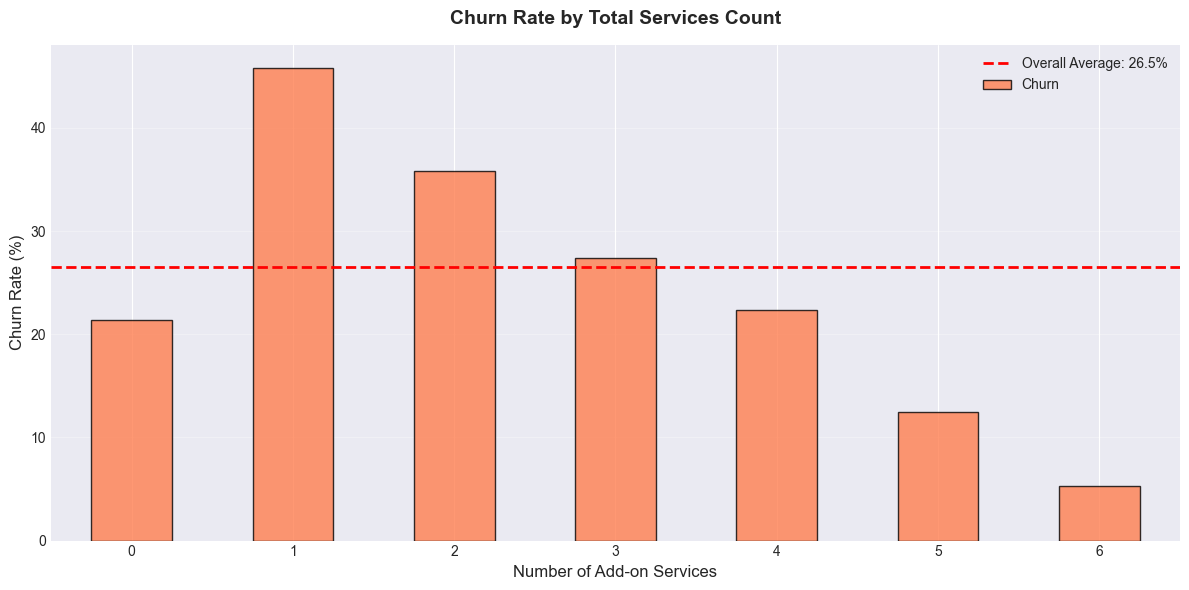


📊 Expected pattern: Higher services → Lower churn

Churn rate by service count:
total_services
0    21.4
1    45.8
2    35.8
3    27.4
4    22.3
5    12.4
6     5.3
Name: Churn, dtype: float64


In [7]:
# Validate: Service count vs Churn
churn_by_services = df.groupby('total_services')['Churn'].mean() * 100

plt.figure(figsize=(12, 6))
churn_by_services.plot(kind='bar', color='coral', edgecolor='black', alpha=0.8)
plt.title('Churn Rate by Total Services Count', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Number of Add-on Services', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xticks(rotation=0)
plt.axhline(df['Churn'].mean() * 100, color='red', linestyle='--', linewidth=2, 
            label=f'Overall Average: {df["Churn"].mean()*100:.1f}%')
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Expected pattern: Higher services → Lower churn")
print("\nChurn rate by service count:")
print(churn_by_services.round(1))

## 5. Security Bundle Features (4 features)

**Rationale from Phase 2C:**
- OnlineSecurity reduces churn by 27%
- Customers with security bundles are 3x more loyal

In [8]:
print("🔧 Creating Security Bundle Features...\n")

# 1. Has security bundle (OnlineSecurity + OnlineBackup)
df['has_security_bundle'] = (
    (df['OnlineSecurity_binary'] == 1) & 
    (df['OnlineBackup_binary'] == 1)
).astype(int)

# 2. Has premium protection (all 4 security services)
df['has_premium_protection'] = (
    df['security_services_count'] == 4
).astype(int)

# 3. Security gap (has internet but no security)
df['has_security_gap'] = (
    (df['has_internet'] == 1) & 
    (df['security_services_count'] == 0)
).astype(int)

# 4. Partial security (1-2 security services, not complete)
df['has_partial_security'] = (
    (df['security_services_count'] >= 1) & 
    (df['security_services_count'] <= 2)
).astype(int)

print("✅ Created 4 security bundle features")
print(f"\n📊 Security analysis:")
print(f"  🚨 Security gap customers (at-risk): {df['has_security_gap'].sum():,} ({df['has_security_gap'].mean()*100:.1f}%)")
print(f"  ✅ Premium protection customers: {df['has_premium_protection'].sum():,} ({df['has_premium_protection'].mean()*100:.1f}%)")
print(f"  ⚠️  Partial security customers: {df['has_partial_security'].sum():,} ({df['has_partial_security'].mean()*100:.1f}%)")
print(f"  🛡️ Security bundle customers: {df['has_security_bundle'].sum():,} ({df['has_security_bundle'].mean()*100:.1f}%)")

🔧 Creating Security Bundle Features...

✅ Created 4 security bundle features

📊 Security analysis:
  🚨 Security gap customers (at-risk): 1,267 (18.0%)
  ✅ Premium protection customers: 470 (6.7%)
  ⚠️  Partial security customers: 2,839 (40.3%)
  🛡️ Security bundle customers: 1,126 (16.0%)


## 6. Family/Multi-User Features (3 features)

**Rationale:**
- Customers with dependents/partners are less likely to churn
- Streaming services indicate household usage

In [9]:
print("🔧 Creating Family/Multi-User Features...\n")

# 1. Is likely household (partner OR dependents)
df['is_likely_household'] = (
    (df['Partner'] == 1) | 
    (df['Dependents'] == 1)
).astype(int)

# 2. Family size indicator (0=single, 1=couple, 2=family)
df['family_size_indicator'] = (
    df['Partner'] + df['Dependents']
)

# 3. Heavy streaming user (both TV and Movies)
df['is_heavy_streaming'] = (
    (df['StreamingTV_binary'] == 1) & 
    (df['StreamingMovies_binary'] == 1)
).astype(int)

print("✅ Created 3 family/multi-user features")
print(f"\n📊 Family size distribution:")
family_dist = df['family_size_indicator'].value_counts().sort_index()
for size, count in family_dist.items():
    label = ['Single', 'Couple', 'Family'][size]
    print(f"  {label}: {count:,} ({count/len(df)*100:.1f}%)")

print(f"\n📺 Heavy streaming users: {df['is_heavy_streaming'].sum():,} ({df['is_heavy_streaming'].mean()*100:.1f}%)")

🔧 Creating Family/Multi-User Features...

✅ Created 3 family/multi-user features

📊 Family size distribution:
  Single: 3,280 (46.6%)
  Couple: 2,014 (28.6%)
  Family: 1,749 (24.8%)

📺 Heavy streaming users: 1,940 (27.5%)


## 7. Customer Lifetime Value (CLV) Features (3 features)

**Rationale from Phase 2B:**
- TotalCharges and tenure are top predictors
- High-spending, long-tenure customers are most valuable

In [10]:
print("🔧 Creating Customer Lifetime Value (CLV) Features...\n")

# 1. Projected 24-month value (current monthly rate × 24)
df['projected_24m_value'] = df['MonthlyCharges'] * 24

# 2. Revenue per tenure month (efficiency)
df['revenue_per_month'] = df['TotalCharges'] / df['tenure']

# 3. Loyalty value score (tenure × avg monthly spend)
df['loyalty_value_score'] = df['tenure'] * df['avg_monthly_spend']

print("✅ Created 3 CLV features")
print(f"\n📊 CLV Statistics:")
print(df[['projected_24m_value', 'revenue_per_month', 'loyalty_value_score']].describe().round(2))

🔧 Creating Customer Lifetime Value (CLV) Features...

✅ Created 3 CLV features

📊 CLV Statistics:
       projected_24m_value  revenue_per_month  loyalty_value_score
count              7043.00            7032.00              7043.00
mean               1554.28              64.80              2220.74
std                 722.16              30.19              2243.50
min                 438.00              13.78                 0.00
25%                 852.00              36.18               354.93
50%                1688.40              70.37              1350.43
75%                2156.40              90.18              3722.17
max                2850.00             121.40              8565.83


## 8. Interaction Features - Part 1: Contract × Tenure (3 features)

**Rationale:**
- Combine insights from Phase 2 to capture high-risk combinations
- Only mix features with correlation < 0.7 (avoid multicollinearity)

In [11]:
print("🔧 Creating Contract × Tenure Interactions...\n")

# 1. Month-to-month + New customer (HIGHEST RISK: 60%+ churn)
df['mtm_new_customer'] = (
    (df['Contract'] == 'Month-to-month') & 
    (df['is_new_customer'] == 1)
).astype(int)

# 2. Month-to-month + Mid tenure (still risky)
df['mtm_mid_tenure'] = (
    (df['Contract'] == 'Month-to-month') & 
    (df['tenure_group'].isin(['13-24m', '25-36m']))
).astype(int)

# 3. Long contract + Long tenure (LOWEST RISK: <10% churn)
df['long_contract_loyal'] = (
    (df['Contract'] == 'Two year') & 
    (df['tenure_group'] == '37m+')
).astype(int)

print("✅ Created 3 contract-tenure interactions")
print(f"\n📊 Contract-Tenure Segments:")
print(f"  🚨 MTM new customers (high risk): {df['mtm_new_customer'].sum():,} ({df['mtm_new_customer'].mean()*100:.1f}%)")
print(f"  ⚠️  MTM mid-tenure: {df['mtm_mid_tenure'].sum():,} ({df['mtm_mid_tenure'].mean()*100:.1f}%)")
print(f"  ✅ Long-contract loyal (low risk): {df['long_contract_loyal'].sum():,} ({df['long_contract_loyal'].mean()*100:.1f}%)")

🔧 Creating Contract × Tenure Interactions...

✅ Created 3 contract-tenure interactions

📊 Contract-Tenure Segments:
  🚨 MTM new customers (high risk): 1,994 (28.3%)
  ⚠️  MTM mid-tenure: 1,223 (17.4%)
  ✅ Long-contract loyal (low risk): 1,441 (20.5%)


## 9. Interaction Features - Part 2: Internet × Contract (2 features)

In [12]:
print("🔧 Creating Internet Service × Contract Interactions...\n")

# 1. Fiber optic + Month-to-month (42% churn)
df['fiber_mtm_risk'] = (
    (df['is_fiber'] == 1) & 
    (df['Contract'] == 'Month-to-month')
).astype(int)

# 2. Fiber + Long contract (much lower risk)
df['fiber_long_contract'] = (
    (df['is_fiber'] == 1) & 
    (df['Contract'] == 'Two year')
).astype(int)

print("✅ Created 2 internet-contract interactions")
print(f"\n📊 Fiber Service Segments:")
print(f"  🚨 Fiber MTM risk customers: {df['fiber_mtm_risk'].sum():,} ({df['fiber_mtm_risk'].mean()*100:.1f}%)")
print(f"  ✅ Fiber long-contract: {df['fiber_long_contract'].sum():,} ({df['fiber_long_contract'].mean()*100:.1f}%)")

🔧 Creating Internet Service × Contract Interactions...

✅ Created 2 internet-contract interactions

📊 Fiber Service Segments:
  🚨 Fiber MTM risk customers: 2,128 (30.2%)
  ✅ Fiber long-contract: 429 (6.1%)


## 10. Interaction Features - Part 3: Price × Services (3 features)

In [13]:
print("🔧 Creating Price × Services Interactions...\n")

# 1. High price + No services (poor value perception)
df['high_price_no_services'] = (
    (df['is_high_price'] == 1) & 
    (df['total_services'] == 0)
).astype(int)

# 2. High price + Full services (premium customer, good value)
df['high_price_full_services'] = (
    (df['is_high_price'] == 1) & 
    (df['is_fully_engaged'] == 1)
).astype(int)

# 3. New customer + High price (at-risk: paying premium without loyalty)
df['new_customer_high_price'] = (
    (df['is_new_customer'] == 1) & 
    (df['is_high_price'] == 1)
).astype(int)

print("✅ Created 3 price-services interactions")
print(f"\n📊 Price-Service Segments:")
print(f"  🚨 High price, no services (at-risk): {df['high_price_no_services'].sum():,} ({df['high_price_no_services'].mean()*100:.1f}%)")
print(f"  ✅ High price, full services (premium): {df['high_price_full_services'].sum():,} ({df['high_price_full_services'].mean()*100:.1f}%)")
print(f"  ⚠️  New customer, high price: {df['new_customer_high_price'].sum():,} ({df['new_customer_high_price'].mean()*100:.1f}%)")

🔧 Creating Price × Services Interactions...

✅ Created 3 price-services interactions

📊 Price-Service Segments:
  🚨 High price, no services (at-risk): 287 (4.1%)
  ✅ High price, full services (premium): 259 (3.7%)
  ⚠️  New customer, high price: 875 (12.4%)


## 11. Interaction Features - Part 4: Payment × Service (2 features)

In [14]:
print("🔧 Creating Payment × Service Interactions...\n")

# 1. Electronic check + No autopay (45% churn)
df['echeck_no_autopay'] = (
    (df['is_electronic_check'] == 1) & 
    (df['is_auto_payment'] == 0)
).astype(int)

# 2. Paperless billing + No autopay (engagement gap)
df['paperless_no_autopay'] = (
    (df['PaperlessBilling'] == 1) & 
    (df['is_auto_payment'] == 0)
).astype(int)

print("✅ Created 2 payment-service interactions")
print(f"\n📊 Payment Behavior Segments:")
print(f"  🚨 E-check without autopay (high-risk): {df['echeck_no_autopay'].sum():,} ({df['echeck_no_autopay'].mean()*100:.1f}%)")
print(f"  ⚠️  Paperless without autopay: {df['paperless_no_autopay'].sum():,} ({df['paperless_no_autopay'].mean()*100:.1f}%)")

🔧 Creating Payment × Service Interactions...

✅ Created 2 payment-service interactions

📊 Payment Behavior Segments:
  🚨 E-check without autopay (high-risk): 2,365 (33.6%)
  ⚠️  Paperless without autopay: 2,398 (34.0%)


## 12. Interaction Features - Part 5: Demographics × Services (2 features)

In [15]:
print("🔧 Creating Demographics × Services Interactions...\n")

# 1. Senior + No TechSupport (vulnerable segment)
df['senior_no_support'] = (
    (df['SeniorCitizen'] == 1) & 
    (df['TechSupport_binary'] == 0)
).astype(int)

# 2. Single (no partner/dependents) + No phone service (minimal engagement)
df['single_minimal_services'] = (
    (df['is_likely_household'] == 0) & 
    (df['PhoneService'] == 0)
).astype(int)

print("✅ Created 2 demographics-services interactions")
print(f"\n📊 Demographic-Service Segments:")
print(f"  🚨 Seniors without tech support (vulnerable): {df['senior_no_support'].sum():,} ({df['senior_no_support'].mean()*100:.1f}%)")
print(f"  ⚠️  Single, minimal services: {df['single_minimal_services'].sum():,} ({df['single_minimal_services'].mean()*100:.1f}%)")

🔧 Creating Demographics × Services Interactions...

✅ Created 2 demographics-services interactions

📊 Demographic-Service Segments:
  🚨 Seniors without tech support (vulnerable): 882 (12.5%)
  ⚠️  Single, minimal services: 327 (4.6%)


In [16]:
# Summary of all 12 interactions
interaction_features = [
    'mtm_new_customer', 'mtm_mid_tenure', 'long_contract_loyal',
    'fiber_mtm_risk', 'fiber_long_contract',
    'high_price_no_services', 'high_price_full_services', 'new_customer_high_price',
    'echeck_no_autopay', 'paperless_no_autopay',
    'senior_no_support', 'single_minimal_services'
]

print("\n" + "="*80)
print("📊 COMPLETE INTERACTION FEATURE SUMMARY")
print("="*80)
print(f"\n{'Feature':<35} {'Count':>8} {'% Total':>8} {'Churn %':>8}")
print("-"*80)
for feat in interaction_features:
    count = df[feat].sum()
    pct = df[feat].mean() * 100
    churn_rate = df[df[feat] == 1]['Churn'].mean() * 100 if count > 0 else 0
    print(f"{feat:<35} {count:>8,} {pct:>7.1f}% {churn_rate:>7.1f}%")
print("="*80)


📊 COMPLETE INTERACTION FEATURE SUMMARY

Feature                                Count  % Total  Churn %
--------------------------------------------------------------------------------
mtm_new_customer                       1,994    28.3%    51.4%
mtm_mid_tenure                         1,223    17.4%    35.7%
long_contract_loyal                    1,441    20.5%     3.2%
fiber_mtm_risk                         2,128    30.2%    54.6%
fiber_long_contract                      429     6.1%     7.2%
high_price_no_services                   287     4.1%    59.6%
high_price_full_services                 259     3.7%     5.8%
new_customer_high_price                  875    12.4%    67.9%
echeck_no_autopay                      2,365    33.6%    45.3%
paperless_no_autopay                   2,398    34.0%    43.6%
senior_no_support                        882    12.5%    48.2%
single_minimal_services                  327     4.6%    31.5%


## 13. Risk Flags (5 features)

**Rationale:**
- Binary flags for high-risk segments identified in Phase 2C
- Useful for business rules and model interpretability

In [17]:
print("🔧 Creating Risk Flags...\n")

# 1. Churn flight risk (3+ high-risk factors)
df['is_flight_risk'] = (
    (df['Contract'] == 'Month-to-month').astype(int) + 
    (df['is_fiber'] == 1).astype(int) + 
    (df['is_electronic_check'] == 1).astype(int) + 
    (df['has_security_gap'] == 1).astype(int) + 
    (df['is_new_customer'] == 1).astype(int)
) >= 3
df['is_flight_risk'] = df['is_flight_risk'].astype(int)

# 2. Value at risk (high CLV but risky profile)
high_value_threshold = df['loyalty_value_score'].quantile(0.75)
df['is_value_at_risk'] = (
    (df['loyalty_value_score'] > high_value_threshold) & 
    (df['is_flight_risk'] == 1)
).astype(int)

# 3. Needs retention (mid-tenure MTM customers)
df['needs_retention'] = (
    (df['Contract'] == 'Month-to-month') & 
    (df['tenure'] >= 12) & 
    (df['tenure'] <= 36)
).astype(int)

# 4. Upsell opportunity (low services but long tenure)
df['upsell_opportunity'] = (
    (df['tenure'] >= 24) & 
    (df['total_services'] <= 2)
).astype(int)

# 5. Premium retention target (high value + low risk)
df['premium_retention_target'] = (
    (df['loyalty_value_score'] > high_value_threshold) & 
    (df['is_flight_risk'] == 0) & 
    (df['Contract'] == 'Two year')
).astype(int)

print("✅ Created 5 risk flags")
print(f"\n🚨 Risk Flag Summary:")
print(f"  🔴 Flight risk customers: {df['is_flight_risk'].sum():,} ({df['is_flight_risk'].mean()*100:.1f}%)")
print(f"  💰 Value at risk: {df['is_value_at_risk'].sum():,} ({df['is_value_at_risk'].mean()*100:.1f}%)")
print(f"  ⚠️  Needs retention: {df['needs_retention'].sum():,} ({df['needs_retention'].mean()*100:.1f}%)")
print(f"  📈 Upsell opportunity: {df['upsell_opportunity'].sum():,} ({df['upsell_opportunity'].mean()*100:.1f}%)")
print(f"  ⭐ Premium targets: {df['premium_retention_target'].sum():,} ({df['premium_retention_target'].mean()*100:.1f}%)")

🔧 Creating Risk Flags...

✅ Created 5 risk flags

🚨 Risk Flag Summary:
  🔴 Flight risk customers: 2,250 (31.9%)
  💰 Value at risk: 227 (3.2%)
  ⚠️  Needs retention: 1,309 (18.6%)
  📈 Upsell opportunity: 1,651 (23.4%)
  ⭐ Premium targets: 824 (11.7%)


In [18]:
# Validate risk flags vs churn
risk_flags = ['is_flight_risk', 'is_value_at_risk', 'needs_retention', 
              'upsell_opportunity', 'premium_retention_target']

print("\n📊 Risk Flag Validation (Churn Rates):")
print("-" * 60)
for flag in risk_flags:
    churn_rate = df[df[flag] == 1]['Churn'].mean() * 100
    count = df[flag].sum()
    print(f"{flag:35s}: {churn_rate:5.1f}% churn (n={count:,})")
print("-" * 60)
print(f"{'Overall churn rate':35s}: {df['Churn'].mean()*100:5.1f}%")


📊 Risk Flag Validation (Churn Rates):
------------------------------------------------------------
is_flight_risk                     :  57.1% churn (n=2,250)
is_value_at_risk                   :  39.2% churn (n=227)
needs_retention                    :  35.8% churn (n=1,309)
upsell_opportunity                 :  13.1% churn (n=1,651)
premium_retention_target           :   4.6% churn (n=824)
------------------------------------------------------------
Overall churn rate                 :  26.5%


## 14. Feature Summary and Metadata

In [19]:
# Count new features
phase3b_features = [
    # Service counts (5)
    'total_services', 'security_services_count', 'entertainment_services_count',
    'has_any_services', 'is_fully_engaged',
    # Security bundles (4)
    'has_security_bundle', 'has_premium_protection', 'has_security_gap', 'has_partial_security',
    # Family features (3)
    'is_likely_household', 'family_size_indicator', 'is_heavy_streaming',
    # CLV features (3)
    'projected_24m_value', 'revenue_per_month', 'loyalty_value_score',
    # Interactions (12)
    'mtm_new_customer', 'mtm_mid_tenure', 'long_contract_loyal',
    'fiber_mtm_risk', 'fiber_long_contract',
    'high_price_no_services', 'high_price_full_services', 'new_customer_high_price',
    'echeck_no_autopay', 'paperless_no_autopay',
    'senior_no_support', 'single_minimal_services',
    # Risk flags (5)
    'is_flight_risk', 'is_value_at_risk', 'needs_retention',
    'upsell_opportunity', 'premium_retention_target'
]

print("="*80)
print("📊 PHASE 3B FEATURE ENGINEERING SUMMARY")
print("="*80)
print(f"\n✅ Created {len(phase3b_features)} new features in Phase 3B")
print(f"✅ Total columns in dataset: {df.shape[1]}")
print(f"\n📋 New feature categories:")
print(f"  • Service counts: 5 features")
print(f"  • Security bundles: 4 features")
print(f"  • Family features: 3 features")
print(f"  • CLV features: 3 features")
print(f"  • Interactions: 12 features")
print(f"  • Risk flags: 5 features")
print("="*80)

📊 PHASE 3B FEATURE ENGINEERING SUMMARY

✅ Created 32 new features in Phase 3B
✅ Total columns in dataset: 79

📋 New feature categories:
  • Service counts: 5 features
  • Security bundles: 4 features
  • Family features: 3 features
  • CLV features: 3 features
  • Interactions: 12 features
  • Risk flags: 5 features


In [20]:
# Create feature metadata
metadata = []

# Service count features
metadata.extend([
    {'feature': 'total_services', 'type': 'count', 'range': '0-6', 'description': 'Total add-on services subscribed'},
    {'feature': 'security_services_count', 'type': 'count', 'range': '0-4', 'description': 'Security-related services count'},
    {'feature': 'entertainment_services_count', 'type': 'count', 'range': '0-2', 'description': 'Streaming services count'},
    {'feature': 'has_any_services', 'type': 'binary', 'range': '0-1', 'description': 'Has at least one add-on service'},
    {'feature': 'is_fully_engaged', 'type': 'binary', 'range': '0-1', 'description': 'Subscribed to all 6 add-ons'},
])

# Security bundles
metadata.extend([
    {'feature': 'has_security_bundle', 'type': 'binary', 'range': '0-1', 'description': 'Has OnlineSecurity + OnlineBackup'},
    {'feature': 'has_premium_protection', 'type': 'binary', 'range': '0-1', 'description': 'Has all 4 security services'},
    {'feature': 'has_security_gap', 'type': 'binary', 'range': '0-1', 'description': 'Has internet but no security services'},
    {'feature': 'has_partial_security', 'type': 'binary', 'range': '0-1', 'description': 'Has 1-2 security services (incomplete)'},
])

# Family features
metadata.extend([
    {'feature': 'is_likely_household', 'type': 'binary', 'range': '0-1', 'description': 'Has partner OR dependents'},
    {'feature': 'family_size_indicator', 'type': 'ordinal', 'range': '0-2', 'description': '0=single, 1=couple, 2=family'},
    {'feature': 'is_heavy_streaming', 'type': 'binary', 'range': '0-1', 'description': 'Has both TV and Movies streaming'},
])

# CLV features
metadata.extend([
    {'feature': 'projected_24m_value', 'type': 'continuous', 'range': 'currency', 'description': 'MonthlyCharges × 24 months'},
    {'feature': 'revenue_per_month', 'type': 'continuous', 'range': 'currency', 'description': 'TotalCharges / tenure'},
    {'feature': 'loyalty_value_score', 'type': 'continuous', 'range': 'score', 'description': 'tenure × avg_monthly_spend'},
])

# Interactions
metadata.extend([
    {'feature': 'mtm_new_customer', 'type': 'interaction', 'range': '0-1', 'description': 'MTM contract + new customer (high risk)'},
    {'feature': 'mtm_mid_tenure', 'type': 'interaction', 'range': '0-1', 'description': 'MTM contract + mid-tenure customer'},
    {'feature': 'long_contract_loyal', 'type': 'interaction', 'range': '0-1', 'description': '2-year contract + loyal customer (low risk)'},
    {'feature': 'fiber_mtm_risk', 'type': 'interaction', 'range': '0-1', 'description': 'Fiber + MTM contract (42% churn)'},
    {'feature': 'fiber_long_contract', 'type': 'interaction', 'range': '0-1', 'description': 'Fiber + 2-year contract'},
    {'feature': 'high_price_no_services', 'type': 'interaction', 'range': '0-1', 'description': 'High price but no add-ons (poor value)'},
    {'feature': 'high_price_full_services', 'type': 'interaction', 'range': '0-1', 'description': 'High price with all services (premium)'},
    {'feature': 'new_customer_high_price', 'type': 'interaction', 'range': '0-1', 'description': 'New customer paying premium'},
    {'feature': 'echeck_no_autopay', 'type': 'interaction', 'range': '0-1', 'description': 'E-check without autopay (45% churn)'},
    {'feature': 'paperless_no_autopay', 'type': 'interaction', 'range': '0-1', 'description': 'Paperless billing without autopay'},
    {'feature': 'senior_no_support', 'type': 'interaction', 'range': '0-1', 'description': 'Senior without TechSupport (vulnerable)'},
    {'feature': 'single_minimal_services', 'type': 'interaction', 'range': '0-1', 'description': 'Single customer with minimal services'},
])

# Risk flags
metadata.extend([
    {'feature': 'is_flight_risk', 'type': 'risk_flag', 'range': '0-1', 'description': '3+ high-risk factors present'},
    {'feature': 'is_value_at_risk', 'type': 'risk_flag', 'range': '0-1', 'description': 'High CLV + flight risk'},
    {'feature': 'needs_retention', 'type': 'risk_flag', 'range': '0-1', 'description': 'MTM mid-tenure customers'},
    {'feature': 'upsell_opportunity', 'type': 'risk_flag', 'range': '0-1', 'description': 'Long tenure, low services'},
    {'feature': 'premium_retention_target', 'type': 'risk_flag', 'range': '0-1', 'description': 'High value, low risk, 2-year contract'},
])

metadata_df = pd.DataFrame(metadata)
print("\n✅ Feature metadata created")
print(f"\n📋 Sample metadata (first 10 features):")
print(metadata_df.head(10).to_string(index=False))


✅ Feature metadata created

📋 Sample metadata (first 10 features):
                     feature   type range                            description
              total_services  count   0-6       Total add-on services subscribed
     security_services_count  count   0-4        Security-related services count
entertainment_services_count  count   0-2               Streaming services count
            has_any_services binary   0-1        Has at least one add-on service
            is_fully_engaged binary   0-1            Subscribed to all 6 add-ons
         has_security_bundle binary   0-1      Has OnlineSecurity + OnlineBackup
      has_premium_protection binary   0-1            Has all 4 security services
            has_security_gap binary   0-1  Has internet but no security services
        has_partial_security binary   0-1 Has 1-2 security services (incomplete)
         is_likely_household binary   0-1              Has partner OR dependents


## 15. Correlation Analysis

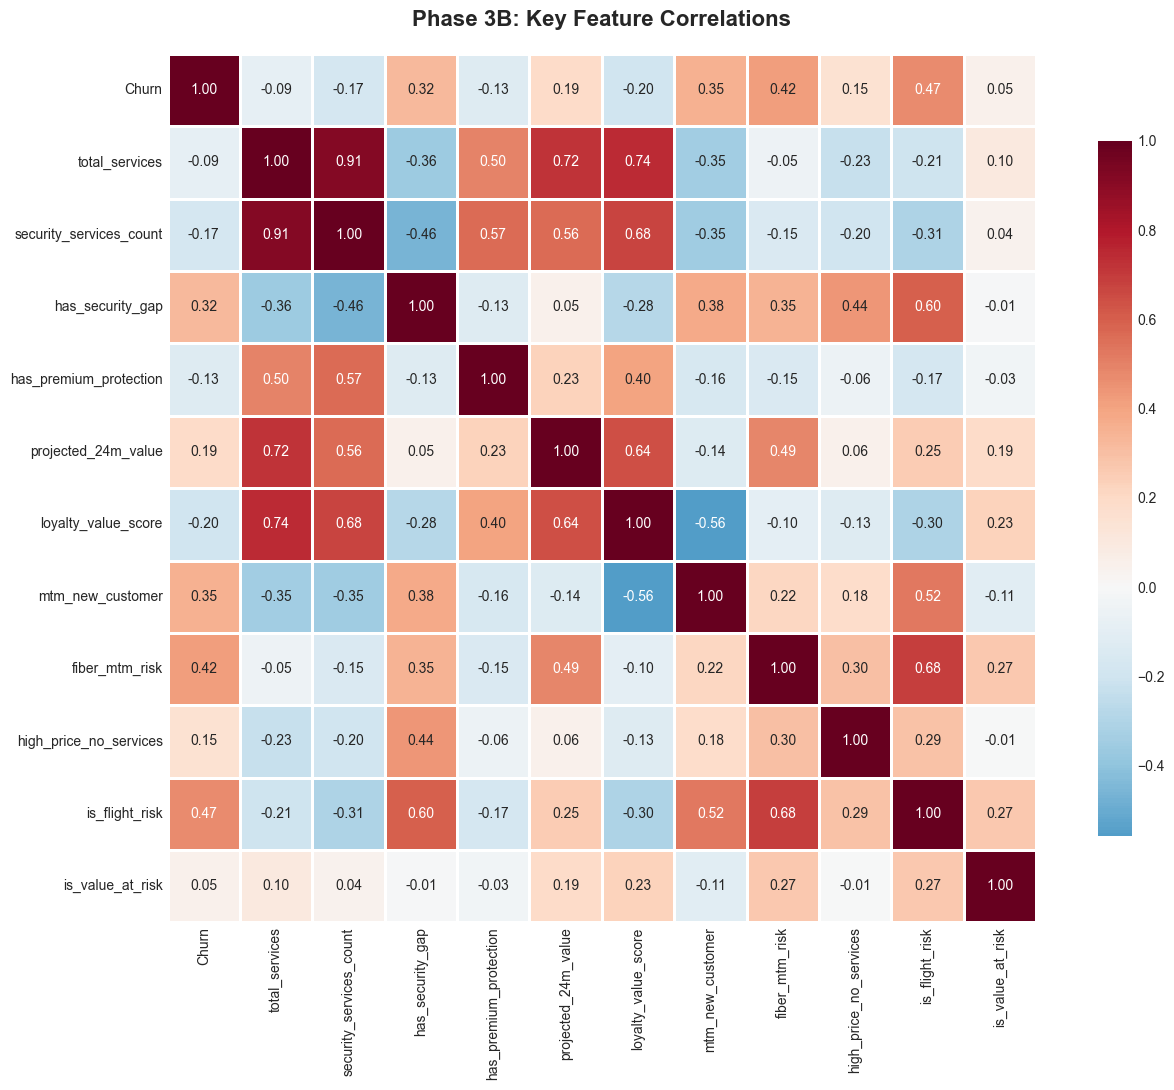

✅ Correlation heatmap saved to visualizations/figures/

📊 Top 5 correlations with Churn:
is_flight_risk         0.47
fiber_mtm_risk         0.42
mtm_new_customer       0.35
has_security_gap       0.32
projected_24m_value    0.19
Name: Churn, dtype: float64


In [21]:
# Select key features for correlation analysis
key_features = [
    'Churn',
    'total_services', 'security_services_count',
    'has_security_gap', 'has_premium_protection',
    'projected_24m_value', 'loyalty_value_score',
    'mtm_new_customer', 'fiber_mtm_risk', 'high_price_no_services',
    'is_flight_risk', 'is_value_at_risk'
]

corr_matrix = df[key_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 11))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Phase 3B: Key Feature Correlations', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(viz_path / '16_feature_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Correlation heatmap saved to visualizations/figures/")
print(f"\n📊 Top 5 correlations with Churn:")
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
print(churn_corr[1:6].round(3))  # Exclude Churn itself

## 16. Interaction Feature Distributions

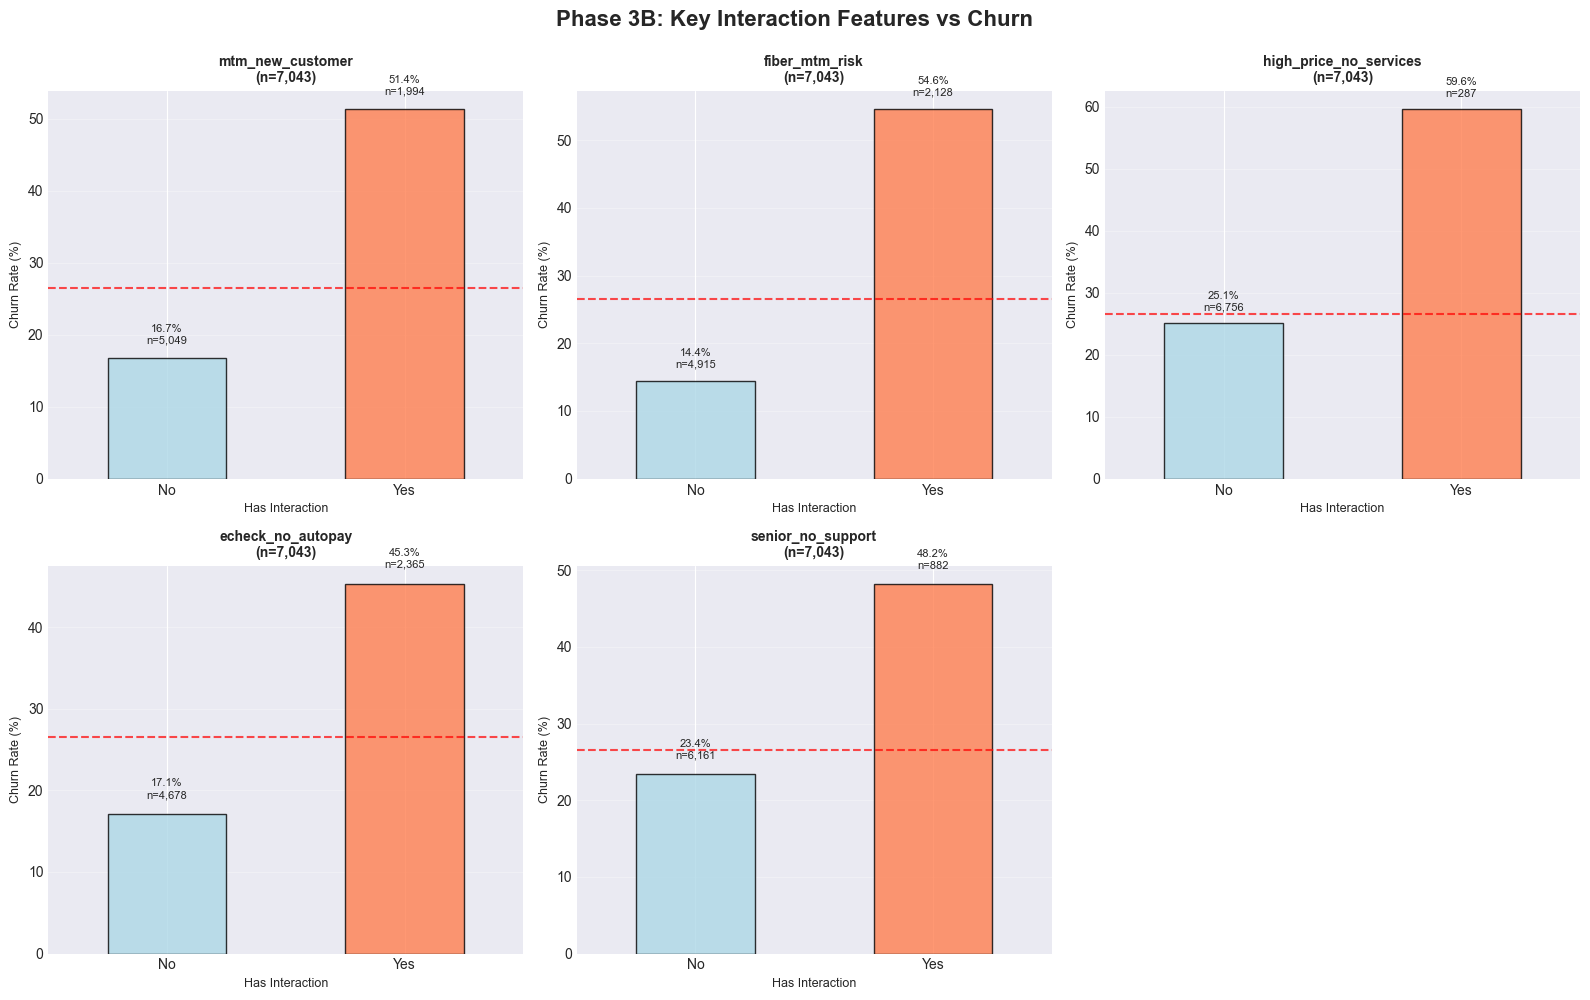

✅ Interaction distributions saved to visualizations/figures/


In [27]:
# Visualize key interactions
key_interactions = [
    'mtm_new_customer', 'fiber_mtm_risk', 'high_price_no_services',
    'echeck_no_autopay', 'senior_no_support'
]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_interactions):
    # Churn rate by interaction
    churn_by_interaction = df.groupby(feature)['Churn'].agg(['mean', 'count'])
    churn_by_interaction['mean'] *= 100
    
    # Plot
    ax = axes[idx]
    churn_by_interaction['mean'].plot(kind='bar', ax=ax, color=['lightblue', 'coral'], 
                                      edgecolor='black', alpha=0.8)
    ax.set_title(f'{feature}\n(n={churn_by_interaction["count"].sum():,})', fontweight='bold', fontsize=10)
    ax.set_xlabel('Has Interaction', fontsize=9)
    ax.set_ylabel('Churn Rate (%)', fontsize=9)
    ax.set_xticklabels(['No', 'Yes'], rotation=0)
    ax.axhline(df['Churn'].mean() * 100, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
    
    # Annotate counts
    for i, (idx_val, row) in enumerate(churn_by_interaction.iterrows()):
        ax.text(i, row['mean'] + 2, f"{row['mean']:.1f}%\nn={int(row['count']):,}", 
                ha='center', fontsize=8)
    
    ax.grid(axis='y', alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[5])

plt.suptitle('Phase 3B: Key Interaction Features vs Churn', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig(viz_path / '17_interaction_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Interaction distributions saved to visualizations/figures/")

## 17. Risk Flag Validation

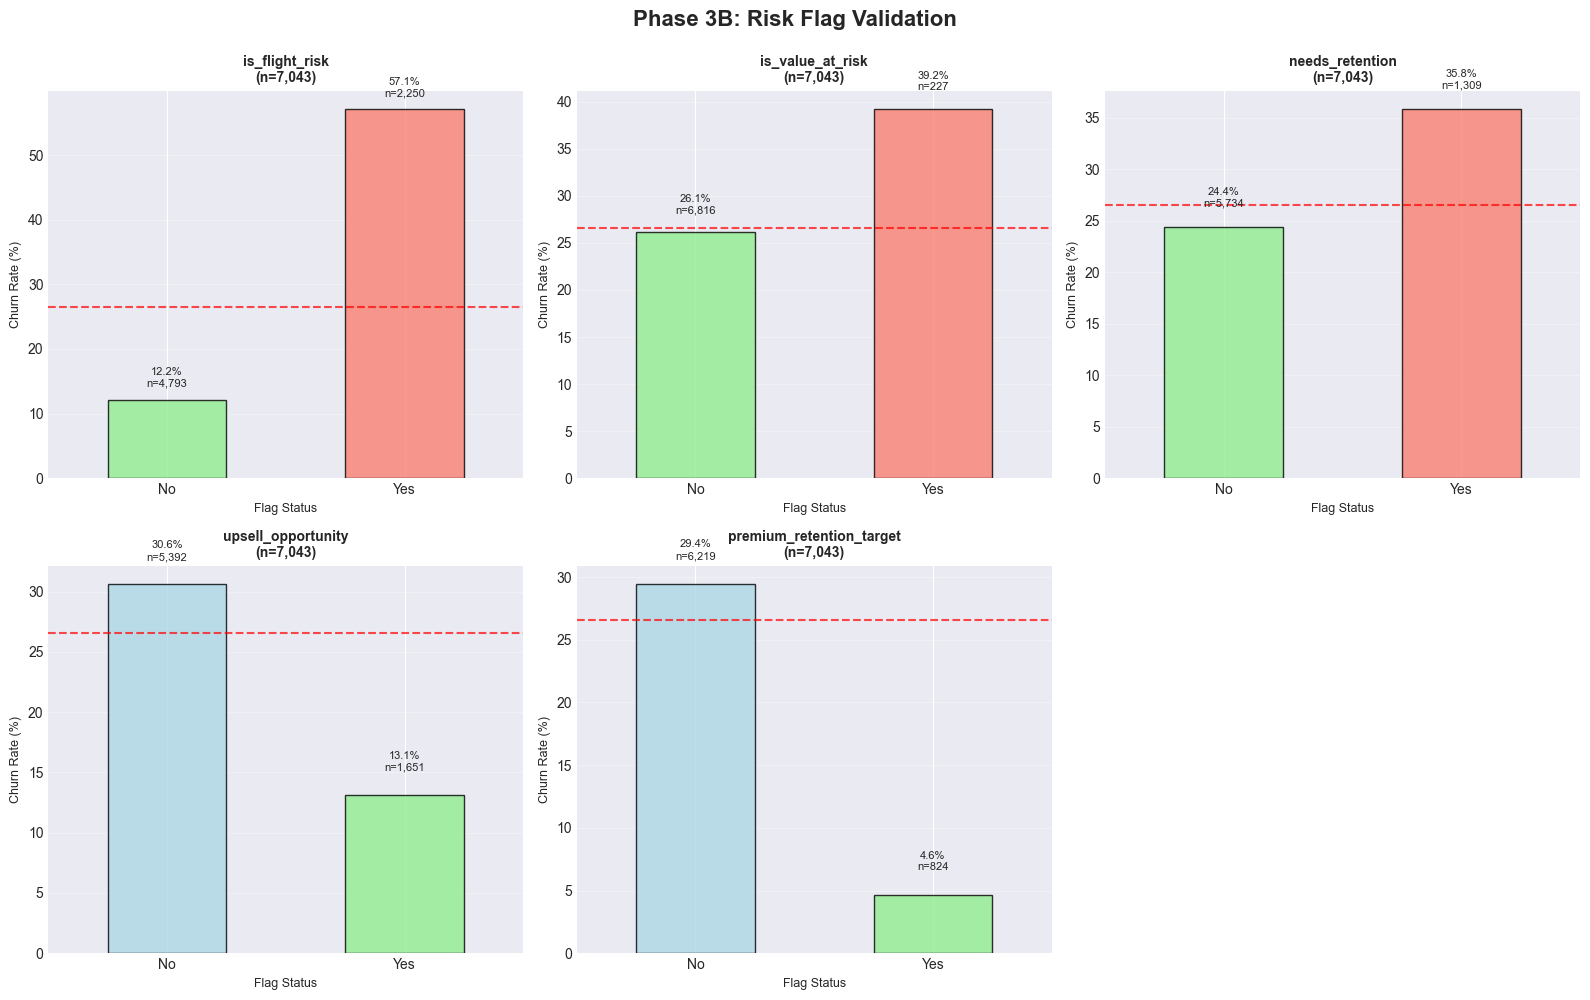

✅ Risk flag validation saved to visualizations/figures/


In [28]:
# Visualize risk flags
risk_flags = ['is_flight_risk', 'is_value_at_risk', 'needs_retention',
              'upsell_opportunity', 'premium_retention_target']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, flag in enumerate(risk_flags):
    # Churn rate by flag
    churn_by_flag = df.groupby(flag)['Churn'].agg(['mean', 'count'])
    churn_by_flag['mean'] *= 100
    
    # Plot
    ax = axes[idx]
    colors = ['lightgreen', 'salmon'] if 'risk' in flag.lower() or 'needs' in flag.lower() else ['lightblue', 'lightgreen']
    churn_by_flag['mean'].plot(kind='bar', ax=ax, color=colors, edgecolor='black', alpha=0.8)
    ax.set_title(f'{flag}\n(n={churn_by_flag["count"].sum():,})', fontweight='bold', fontsize=10)
    ax.set_xlabel('Flag Status', fontsize=9)
    ax.set_ylabel('Churn Rate (%)', fontsize=9)
    ax.set_xticklabels(['No', 'Yes'], rotation=0)
    ax.axhline(df['Churn'].mean() * 100, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
    
    # Annotate counts
    for i, (idx_val, row) in enumerate(churn_by_flag.iterrows()):
        ax.text(i, row['mean'] + 2, f"{row['mean']:.1f}%\nn={int(row['count']):,}", 
                ha='center', fontsize=8)
    
    ax.grid(axis='y', alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[5])

plt.suptitle('Phase 3B: Risk Flag Validation', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig(viz_path / '18_risk_validation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Risk flag validation saved to visualizations/figures/")

## 18. Save Outputs

In [29]:
# Save engineered dataset
output_path = processed_path / 'features_advanced_engineered.csv'
df.to_csv(output_path, index=False)

print(f"✅ Dataset saved: {output_path}")
print(f"  📊 Shape: {df.shape}")
print(f"  💾 Size: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

✅ Dataset saved: /Users/mihiniboteju/churn-prediction-project/data/processed/features_advanced_engineered.csv
  📊 Shape: (7043, 79)
  💾 Size: 8.98 MB


In [30]:
# Save feature metadata
metadata_path = processed_path / 'phase3b_feature_metadata.csv'
metadata_df.to_csv(metadata_path, index=False)

print(f"✅ Metadata saved: {metadata_path}")
print(f"  📋 Features documented: {len(metadata_df)}")

✅ Metadata saved: /Users/mihiniboteju/churn-prediction-project/data/processed/phase3b_feature_metadata.csv
  📋 Features documented: 32


## 19. Phase 3B Complete Summary

In [31]:
print("\n" + "="*80)
print("✅ PHASE 3B COMPLETE: ADVANCED FEATURE ENGINEERING")
print("="*80)
print(f"\n📊 Dataset Summary:")
print(f"  • Input: 7,043 rows × 55 columns (from Phase 3A)")
print(f"  • Output: 7,043 rows × {df.shape[1]} columns")
print(f"  • New features created: {len(phase3b_features)}")
print(f"\n🎯 Feature Categories:")
print(f"  • Service count features: 5")
print(f"  • Security bundle features: 4")
print(f"  • Family/multi-user features: 3")
print(f"  • CLV features: 3")
print(f"  • Interaction features: 12")
print(f"  • Risk flags: 5")
print(f"\n🚨 Key Business Insights:")
print(f"  • Flight risk customers: {df['is_flight_risk'].sum():,} ({df['is_flight_risk'].mean()*100:.1f}%) - Churn: {df[df['is_flight_risk']==1]['Churn'].mean()*100:.1f}%")
print(f"  • Value at risk: {df['is_value_at_risk'].sum():,} ({df['is_value_at_risk'].mean()*100:.1f}%)")
print(f"  • MTM new customers (highest risk): {df['mtm_new_customer'].sum():,} - Churn: {df[df['mtm_new_customer']==1]['Churn'].mean()*100:.1f}%")
print(f"  • Fiber MTM risk: {df['fiber_mtm_risk'].sum():,} - Churn: {df[df['fiber_mtm_risk']==1]['Churn'].mean()*100:.1f}%")
print(f"  • Premium retention targets: {df['premium_retention_target'].sum():,} - Churn: {df[df['premium_retention_target']==1]['Churn'].mean()*100:.1f}%")
print(f"\n📁 Outputs Generated:")
print(f"  ✅ features_advanced_engineered.csv ({df.shape[1]} columns)")
print(f"  ✅ phase3b_feature_metadata.csv ({len(metadata_df)} features documented)")
print(f"  ✅ 16_feature_correlations.png")
print(f"  ✅ 17_interaction_distributions.png")
print(f"  ✅ 18_risk_validation.png")
print(f"\n➡️  Next Step: Phase 3C - Model Preparation (Scaling, Train/Test Split)")
print("="*80)


✅ PHASE 3B COMPLETE: ADVANCED FEATURE ENGINEERING

📊 Dataset Summary:
  • Input: 7,043 rows × 55 columns (from Phase 3A)
  • Output: 7,043 rows × 79 columns
  • New features created: 32

🎯 Feature Categories:
  • Service count features: 5
  • Security bundle features: 4
  • Family/multi-user features: 3
  • CLV features: 3
  • Interaction features: 12
  • Risk flags: 5

🚨 Key Business Insights:
  • Flight risk customers: 2,250 (31.9%) - Churn: 57.1%
  • Value at risk: 227 (3.2%)
  • MTM new customers (highest risk): 1,994 - Churn: 51.4%
  • Fiber MTM risk: 2,128 - Churn: 54.6%
  • Premium retention targets: 824 - Churn: 4.6%

📁 Outputs Generated:
  ✅ features_advanced_engineered.csv (79 columns)
  ✅ phase3b_feature_metadata.csv (32 features documented)
  ✅ 16_feature_correlations.png
  ✅ 17_interaction_distributions.png
  ✅ 18_risk_validation.png

➡️  Next Step: Phase 3C - Model Preparation (Scaling, Train/Test Split)
